# Разведочный анализ

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

Перед тем, как обучать модели ML, данные необходимо предварительно изучить. Делать это полезно по причинам:
- Разведочный анализ данных позволяет выявить основные проблемы и понять, как именно данные нужно предобработать, чтобы корректно обучить модель
- Понимание природы данных поможет придумать новые признаки, которые могут улучшить качество модели

#### Цели

- Занять предобработкой данных, посмотреть какие методы используют для разных переменных
- Впоследствии мы воспользуемся этим набором данных для поиска аномалий

## 1. Описание набора данных и признаков

In [3]:
memes = pd.read_csv('MEMES_new_short.csv', index_col=0)
memes.shape

(4206, 14)

In [4]:
memes.head()

,name,status,type,origin_year,origin_place,date_added,views,videos,photos,comments,tags,about,origin,other_text
0,Muvvafukka,Submission,Viral Video,2019,Facebook,2019-10-24T04:05:03-04:00,13613,0,7,8,"jay-lee hilzinger & maddie flynn, eshayz, davi...",Muvvafukka refers to a viral video of two teen...,While it appears the original video is deleted...,Butler also made a screenshot of Hilzinger's f...
1,Martyrdom (Drop a Live Grenade When Killed),Submission,Reaction,2007,Call of Duty 4: Modern Warfare,2019-10-23T12:13:13-04:00,13973,0,17,8,"perk, martyrdom, live grenade, reaction image,...",Martyrdom (Drop a Live Grenade When Killed) re...,"On April 12th, 2007, first person shooter Call...",Spread The exact first instance of use of the ...
2,Wet Kylo Ren,Submission,Image Macro,2019,Star Wars: The Rise of Skywalker (Movie Trailer),2019-10-23T11:56:19-04:00,5339,0,12,7,"kylo ren, star wars the rise of skywalker, ada...",Wet Kylo Ren is an image macro series based on...,"On October 21st, 2019, the final trailer for t...","Shortly after the trailer's release, some on T..."
3,You're Invited,Submission,Parody,2019,TikTok,2019-10-23T10:32:04-04:00,2249,0,0,0,"byob, byow, party, flyer, charge, door",You're Invited is a series of TikTok videos pa...,"On October 13th, 2019, TikTok user @coolguycol...","Spread On October 15th, 2019, @moneyxmo upload..."
4,Companies Posting Their Own Names,Submission,Participatory Media,2019,Facebook,2019-10-25T12:42:22-04:00,5662,0,16,33,"social media campaign, brands, companies, max ...",Companies Posting Their Own Names refers to a ...,"On October 18th, 2019, Australian musician and...","Before October 2019, a number of companies and..."


In [5]:
memes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4206 entries, 0 to 4205
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          4206 non-null   object
 1   status        4206 non-null   object
 2   type          1786 non-null   object
 3   origin_year   4206 non-null   object
 4   origin_place  4205 non-null   object
 5   date_added    4206 non-null   object
 6   views         4206 non-null   int64 
 7   videos        4206 non-null   int64 
 8   photos        4206 non-null   int64 
 9   comments      4206 non-null   int64 
 10  tags          4205 non-null   object
 11  about         3798 non-null   object
 12  origin        2524 non-null   object
 13  other_text    3508 non-null   object
dtypes: int64(4), object(10)
memory usage: 492.9+ KB


In [6]:
memes.dtypes

name            object
status          object
type            object
origin_year     object
origin_place    object
date_added      object
views            int64
videos           int64
photos           int64
comments         int64
tags            object
about           object
origin          object
other_text      object
dtype: object

In [7]:
memes.describe()

,views,videos,photos,comments
count,4.206000e+03,4206.000000,4206.000000,4206.000000
mean,7.226205e+04,5.820257,51.473371,39.009510
std,2.470807e+05,19.757376,497.391877,97.193556
min,9.700000e+01,-1.000000,0.000000,0.000000
25%,3.874750e+03,0.000000,1.000000,4.000000
50%,1.574300e+04,0.000000,10.000000,13.000000
75%,5.336375e+04,4.000000,26.000000,35.750000
max,9.095857e+06,469.000000,28911.000000,1713.000000


In [8]:
memes.describe(include = 'object')

,name,status,type,origin_year,origin_place,date_added,tags,about,origin,other_text
count,4206,4206,1786,4206,4205,4206,4205,3798,2524,3508
unique,4205,3,98,117,1885,4204,4001,3648,2501,3503
top,NO REFUNDS,Submission,Exploitable,Unknown,Unknown,2016-10-16T01:19:03-04:00,none...,NOTE: This Entry was related to the 2013 April...,\n\n\n,Spread Various Examples Templates Search Inter...
freq,2,2482,152,349,535,2,168,58,11,3


Самый просматриваемый мем

In [9]:
memes[memes.views == memes.views.max()]

,name,status,type,origin_year,origin_place,date_added,views,videos,photos,comments,tags,about,origin,other_text
3958,Me Gusta,Confirmed,Character,2010,4chan,2018-09-27T16:03:51-04:00,9095857,21,518,142,"4chan, rageguy, spinoff, 4 panel comic, me gus...",Me Gusta is a rage comic face that is typicall...,"The colloquial Spanish phrase ""Me Gusta"" was f...","Spread In December 2010, the single topic blog..."


Внутри нашего набора данных содержутся переменные разного типа: непрерывные категориальные, текстовые, связанные со временем. Чтобы на этих данных обучить какую-то модель, нужно все эти переменные предобработать. Далее мы этим займемся

## 2. Работа со временем

Преобразуем переменную `added` в формат `datetime` и вытащим из неё час, день недели, месяц и год добавления мема.

In [10]:
memes.head()

,name,status,type,origin_year,origin_place,date_added,views,videos,photos,comments,tags,about,origin,other_text
0,Muvvafukka,Submission,Viral Video,2019,Facebook,2019-10-24T04:05:03-04:00,13613,0,7,8,"jay-lee hilzinger & maddie flynn, eshayz, davi...",Muvvafukka refers to a viral video of two teen...,While it appears the original video is deleted...,Butler also made a screenshot of Hilzinger's f...
1,Martyrdom (Drop a Live Grenade When Killed),Submission,Reaction,2007,Call of Duty 4: Modern Warfare,2019-10-23T12:13:13-04:00,13973,0,17,8,"perk, martyrdom, live grenade, reaction image,...",Martyrdom (Drop a Live Grenade When Killed) re...,"On April 12th, 2007, first person shooter Call...",Spread The exact first instance of use of the ...
2,Wet Kylo Ren,Submission,Image Macro,2019,Star Wars: The Rise of Skywalker (Movie Trailer),2019-10-23T11:56:19-04:00,5339,0,12,7,"kylo ren, star wars the rise of skywalker, ada...",Wet Kylo Ren is an image macro series based on...,"On October 21st, 2019, the final trailer for t...","Shortly after the trailer's release, some on T..."
3,You're Invited,Submission,Parody,2019,TikTok,2019-10-23T10:32:04-04:00,2249,0,0,0,"byob, byow, party, flyer, charge, door",You're Invited is a series of TikTok videos pa...,"On October 13th, 2019, TikTok user @coolguycol...","Spread On October 15th, 2019, @moneyxmo upload..."
4,Companies Posting Their Own Names,Submission,Participatory Media,2019,Facebook,2019-10-25T12:42:22-04:00,5662,0,16,33,"social media campaign, brands, companies, max ...",Companies Posting Their Own Names refers to a ...,"On October 18th, 2019, Australian musician and...","Before October 2019, a number of companies and..."


In [46]:
memes['Timestamp'] = pd.to_datetime(memes.date_added)

In [47]:
memes.Timestamp.loc[0]

datetime.datetime(2019, 10, 24, 4, 5, 3, tzinfo=tzoffset(None, -14400))

In [48]:
t = memes.Timestamp.loc[0]
t.timestamp()

1571904303.0

In [49]:
t.year, t.month, t.day, t.hour

(2019, 10, 24, 4)

In [50]:
t.weekday()

3

In [51]:
memes['Year'] = memes.Timestamp.apply(lambda x: x.year)
memes['Month'] = memes.Timestamp.apply(lambda x: x.month)
memes['Day'] = memes.Timestamp.apply(lambda x: x.day)
memes['Hour'] = memes.Timestamp.apply(lambda x: x.hour)
memes['Weekday'] = memes.Timestamp.apply(lambda x: x.weekday())

Также пригодится переменная, отвечающая за число дней, прошедших с момента добавления на сайт

In [77]:
memes_max = memes.Timestamp.max()
memes['days_from_creation'] = memes.Timestamp.apply(lambda x: (memes_max - x).days)

In [78]:
memes['days_from_creation'] 

0         13
1         14
2         14
3         14
4         12
        ... 
4201     659
4202    3596
4203    2231
4204       6
4205     575
Name: days_from_creation, Length: 4206, dtype: int64

Теперь для наших сощзданных переменных построим несколько гистограмм

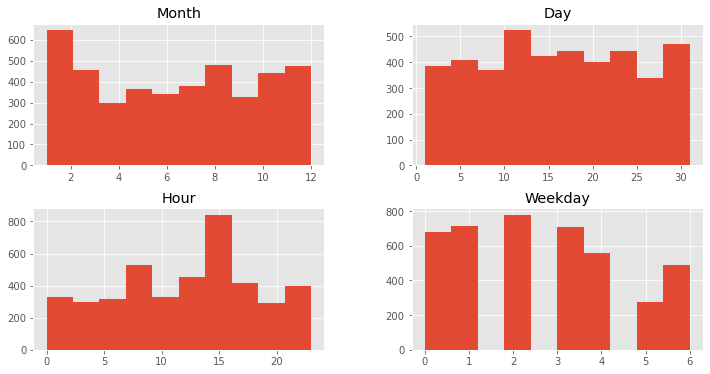

In [80]:
times = ['Month', 'Day', 'Hour','Weekday']
memes[times].hist(figsize=(12,6));

Более сложная картинка с разным числом бинов

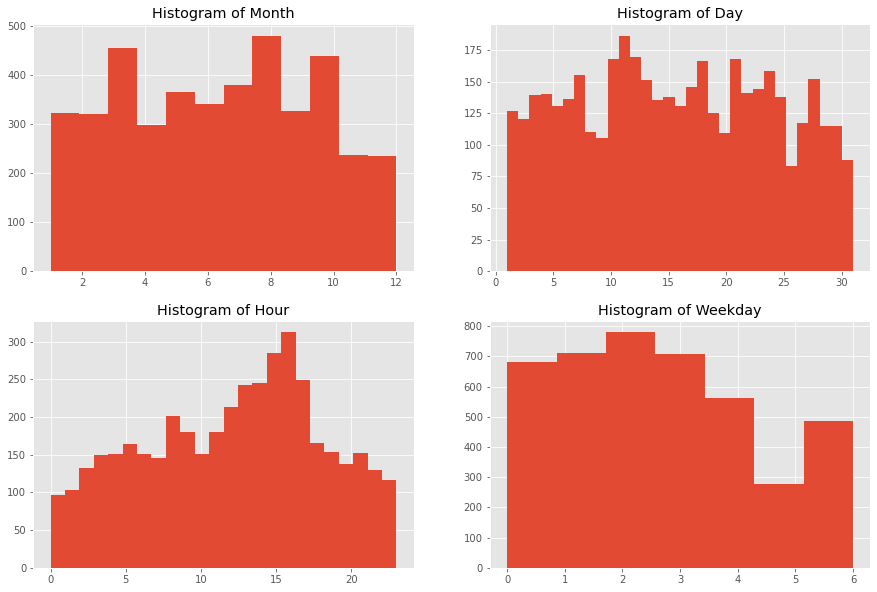

In [82]:
index = 0
fig, ax = plt.subplots(2, 2, figsize=(15,10))

bins = [12, 31, 24, 7]
for i in range(2):
    for j in range(2):
        ax[i,j].hist(memes[times[index]], bins = bins[index])
        ax[i,j].set_title('Histogram of {}'.format(times[index]))
        index += 1

fig.subplots_adjust(hspace = 0.2);

#### Интересные особенности:
- День ничего необычного не принёс, распределено достаточно равномерно
- Гистограмма часа достаточно показательна - в ночной период активность значительно снижается, а затем растет, достигая пика днём
- По дням недели есть заметное снижение на выходных

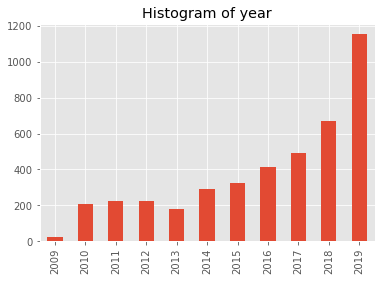

In [87]:
memes.Year.value_counts().sort_index().plot(kind='bar')
plt.title('Histogram of year');

Посмотрим также на вторую переменную, связанную с годом - год появления первоисточника `origin_year`

In [88]:
memes.origin_year.value_counts()[:10]

Unknown    349
2011       329
2016       310
2010       297
2017       281
2013       259
2019       258
2012       236
2014       233
2018       229
Name: origin_year, dtype: int64

In [89]:
memes.origin_year.value_counts()[-10:]

1975    1
1797    1
1926    1
1908    1
1935    1
1964    1
1973    1
1792    1
1927    1
1890    1
Name: origin_year, dtype: int64

In [90]:
memes.loc[memes.origin_year == 'Unknown', 'origin_year'] = None
memes.origin_year.isnull().sum()

349

In [91]:
usl = memes.origin_year.apply(lambda x: str(x).isdigit())

In [92]:
memes.loc[~usl, 'origin_year'] = 0

In [97]:
memes.origin_year = memes.origin_year.astype(int)

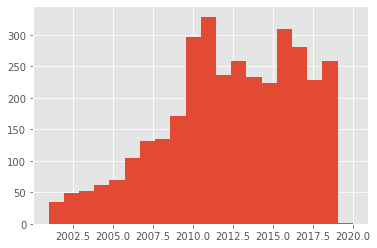

In [98]:
memes.origin_year[
    (memes.origin_year>2000)&(memes.origin_year<=2020)
].hist(bins=20);

Можем посмотреть на наиболее "Исторические" мемы, берющие своё начало, например, до  1500 года

In [99]:
ancient = memes[(memes.origin_year < 1050)&(memes.origin_year != 0)]

for i in ancient.index.tolist():
    print("Name: {}".format(ancient.loc[i, 'name']))
    print("Year: {}".format(ancient.loc[i, 'origin_year']))
    print("About: \n{}".format(ancient.loc[i, 'about']))
    print("============================================================")

Таких нет(

## 3. Непрерывные переменные

Посмотрим на число просмотров

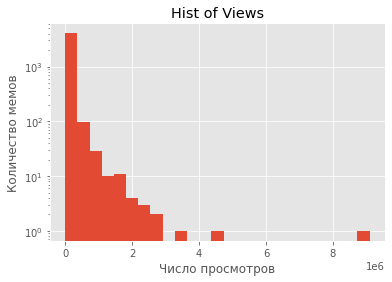

In [101]:
memes.views.hist(bins=25, log=True)

plt.xlabel('Число просмотров')
plt.ylabel('Количество мемов')
plt.title('Hist of Views');

Ожидаемо большинство мемов не пользуется популярностью, и число их просмотров сосредоточено рядом с нулем. Но у нас есть небольшой количество очень популярных мемов, которые набрали десятки миллионов просмотров

В результате, мы имеем распределение с **тяжелым правым хвостом**. Чтобы познакомиться с распределением чуть получше, мы можем **прологарифмировать** значение переменной.

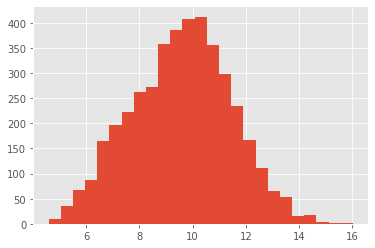

In [103]:
memes.views.apply(lambda x: np.log(x+1)).hist(bins=25);

Выясним какой мем самый популярный. Метрикой популярности, в данном случае, будет оценка среднего числа просомтров в день. Для этого разделим фактическое число просмотров на число дней, прошедших со дня публикации.

In [105]:
memes['average_views'] = memes.views/memes['days_from_creation']

In [106]:
memes.average_views.max()

inf

In [107]:
memes[memes['average_views'] == memes.average_views.max()]['days_from_creation']

53      0
95      0
170     0
191     0
786     0
831     0
986     0
1031    0
1716    0
2371    0
2394    0
3046    0
Name: days_from_creation, dtype: int64

Мемы были созданы в тот день, когда был сбор данных. **А на ноль делить нельзя**

In [108]:
memes['average_views'] = memes.views/(memes['days_from_creation']+1)

In [109]:
memes.average_views.max()

381029.0

Text(0.5, 1.0, 'Hist of average views')

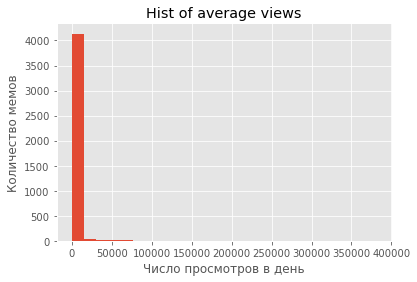

In [112]:
memes.average_views.hist(bins=25)

plt.xlabel('Число просмотров в день')
plt.ylabel('Количество мемов')
plt.title('Hist of average views')

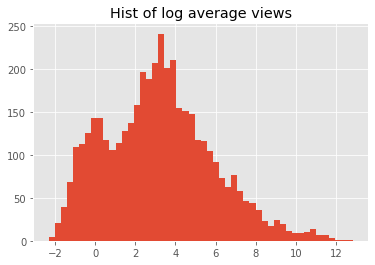

In [114]:
plt.hist(memes.average_views.apply(np.log), bins=50)
plt.title('Hist of log average views');

Распределение числа просмотров за день оказывается мультимодальным (у него два локальных максимума)

Посмотрим на **комментарии**

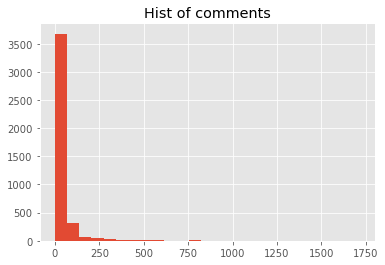

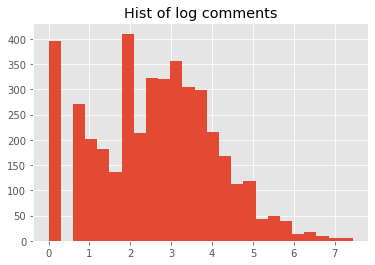

In [116]:
memes.comments.hist(bins=25)
plt.title("Hist of comments")
plt.show()
          
np.log(memes.comments + 1).hist(bins = 25)
plt.title("Hist of log comments")
plt.show();

Поссмотрим на самые комментируемые

In [117]:
memes['average_comments'] = memes.comments/(memes.days_from_creation + 1)

In [119]:
popular = memes.sort_values(by='average_comments', ascending=False)

for i in popular.index.tolist()[:7]:
    print('Meme name:\n{}'.format(popular.loc[i, 'name']))
    print('Average comments (per. day) {}'.format(round(popular.loc[i, 'average_comments'])))
    print("===========================================================")

Meme name:
Miley Cyrus
Average comments (per. day) 90
Meme name:
McDonald’s "Happy" Mascot
Average comments (per. day) 88
Meme name:
Hero Cat
Average comments (per. day) 60
Meme name:
Colonel Meow
Average comments (per. day) 56
Meme name:
Bob the Builder
Average comments (per. day) 56
Meme name:
Mike Pence
Average comments (per. day) 54
Meme name:
Scout Face
Average comments (per. day) 38


In [125]:
# Процент пропусков в колонках
100*memes.isnull().sum()/memes.shape[0]

name                   0.000000
status                 0.000000
type                  57.536852
origin_year            0.000000
origin_place           0.023776
date_added             0.000000
views                  0.000000
videos                 0.000000
photos                 0.000000
comments               0.000000
tags                   0.023776
about                  9.700428
origin                39.990490
other_text            16.595340
Timestamp              0.000000
Year                   0.000000
Month                  0.000000
Day                    0.000000
Hour                   0.000000
Weekday                0.000000
days_from_creation     0.000000
average_views          0.000000
average_comments       0.000000
dtype: float64

## 4. Категориальные и текстовые переменные

Посмотрим на описательные статистики по нашим категориальным переменным.

In [126]:
memes[['status','type','origin_place']].describe()

,status,type,origin_place
count,4206,1786,4205
unique,3,98,1885
top,Submission,Exploitable,Unknown
freq,2482,152,535


Для каждого мема есть три статуса:
- Submisssion - Добавлен недавно или ещё не стал признанным в обществе
- Deadpool - Мем умер и не используется
- Confirmed - Активно используется и получил статус "подтвержденного мема"

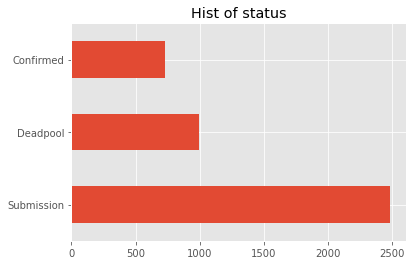

In [127]:
memes.status.value_counts().plot(kind='barh')
plt.title('Hist of status');

Алгоритмы умеют учиться на **числах**. Надо заменить все категории на числа. Вопрос в том, как бы это лучше сделать. Наша переменная принимает три значения. Возникает соблазн заменить Submission на 1, Deadpool на 2, СComfirmed на 3.

Это Неправильный подход. Если так сделать, то некоторые алгоритмы могут подумать, что третий тип самый лучший (т.к. 3 > 2 и 3 > 1), в первый самый плохой. Это запутает алгоритм.

Чтобы не путать алгоритм, поступают следующим образом: делают из категориальной переменной много **дамми-переменных**, то есть переменных, которые принимает значение либо 1 либо 0. Такая процедура называется **one hot encoding**

In [130]:
pd.get_dummies(memes['status'], 
               dummy_na=True,  # Добавляет колонку NaN (Если есть пропуски в данных)
               prefix='ohe_').head()

,ohe__Confirmed,ohe__Deadpool,ohe__Submission,ohe__nan
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [132]:
pd.get_dummies(memes['status'], 
               drop_first=True # Избегание dummy-ловушки
              ).head()

,Deadpool,Submission
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


Если мем относится к типу Confirmed, то у него в соответствующем столбце будет стоять единичка, а в остальных нули. Если категориальных переменных много, то мы переработаем её в слишком большое число столбцов. Это приводит к очень большому пространству признаков и проклятью размерности.

В оставшихся двух переменных очень много вариантов категорий. Посмотрим сколько и как они распределены

In [133]:
memes.type.value_counts()

Exploitable    152
Character      121
Catchphrase    112
Image Macro    111
Controversy     95
              ... 
Podcast          1
Scientist        1
Fan Labor        1
Model            1
Flash Mob        1
Name: type, Length: 98, dtype: int64

Заменим все маленькие категории на `another`

In [139]:
cnt = memes.type.value_counts()
big_category = set(cnt[cnt >= 30].index)
big_category

{'Anime',
 'Catchphrase',
 'Character',
 'Controversy',
 'Copypasta',
 'Exploitable',
 'Image Macro',
 'Parody',
 'Participatory Media',
 'Pop Culture Reference',
 'Reaction',
 'Remix',
 'Slang',
 'Song',
 'Video Game',
 'Viral Video'}

In [143]:
memes.type = memes.type.apply(lambda w: w if w in big_category else 'another')

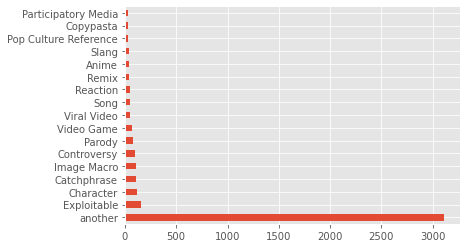

In [145]:
memes.type.value_counts().plot(kind='barh');

По аналогии поступим с местом происхождеия мема

In [146]:
memes.origin_place.value_counts()

Unknown                                           535
YouTube                                           354
Twitter                                           322
4chan                                             179
Reddit                                            141
                                                 ... 
Johan Brand, Jamie Brooker and Morten Versvik.      1
P.E.P.E.                                            1
Toy Story                                           1
Paper Mario and the Thousand Year Door              1
r9k                                                 1
Name: origin_place, Length: 1885, dtype: int64

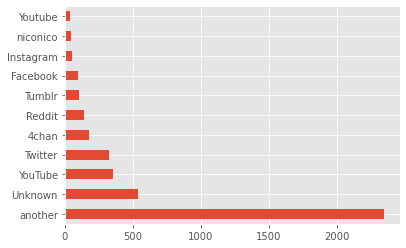

In [147]:
cnt = memes.origin_place.value_counts()
big_category = set(cnt[cnt >= 30].index)

memes.origin_place = memes.origin_place.apply(lambda w: w if w in big_category else 'another')
memes.origin_place.value_counts().plot(kind='barh');

Остались только текстовые переменные. На их основе тоже можно создать новые переменные. Например, посчитать длину текстов или посмотреть входят ли в них какие-то специфические слова. В машинном обучении есть отдельный раздел, который посвящён работе с текстами.

In [148]:
memes[['tags', 'about', 'origin', 'other_text']]

,tags,about,origin,other_text
0,"jay-lee hilzinger & maddie flynn, eshayz, davi...",Muvvafukka refers to a viral video of two teen...,While it appears the original video is deleted...,Butler also made a screenshot of Hilzinger's f...
1,"perk, martyrdom, live grenade, reaction image,...",Martyrdom (Drop a Live Grenade When Killed) re...,"On April 12th, 2007, first person shooter Call...",Spread The exact first instance of use of the ...
2,"kylo ren, star wars the rise of skywalker, ada...",Wet Kylo Ren is an image macro series based on...,"On October 21st, 2019, the final trailer for t...","Shortly after the trailer's release, some on T..."
3,"byob, byow, party, flyer, charge, door",You're Invited is a series of TikTok videos pa...,"On October 13th, 2019, TikTok user @coolguycol...","Spread On October 15th, 2019, @moneyxmo upload..."
4,"social media campaign, brands, companies, max ...",Companies Posting Their Own Names refers to a ...,"On October 18th, 2019, Australian musician and...","Before October 2019, a number of companies and..."
...,...,...,...,...
4201,"youtube poop, audio, harmonizer, remix, scary,...","The ""In G Major"" Youtube Poop fad, or Poopism,...",Chewiki credits Youtube Pooper Gallas as the o...,"However, even though Gallers played an influen..."
4202,none...,Blood Diamond Pants is a reference to the gene...,NaN,"""Godspeed"", the forum member who posted the or..."
4203,"michael j. fox, joke, image macro, 4chan, cele...","Because of Parkinson's (also known as ""Michael...",Michel J. Fox is an Canadian–American actor an...,The first instance of Michael J. Fox's equatio...
4204,"4chan, parrot, paranoia, paranoid parrot, advi...",Paranoid Parrot is an advice animal image macr...,"While the photographer is unknown, the origina...","In 2007, the same image was used to illustrate..."


<AxesSubplot:>

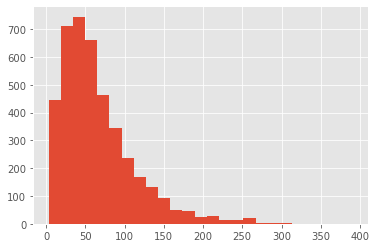

In [150]:
memes['tags_len'] = memes.tags.str.len()
memes['tags_len'].hist(bins=25)

Установим имя в качестве индекса и удалим все лишние колонки

In [151]:
memes.set_index('name')

,status,type,origin_year,origin_place,date_added,views,videos,photos,comments,tags,...,Timestamp,Year,Month,Day,Hour,Weekday,days_from_creation,average_views,average_comments,tags_len
name,,,,,,,,,,,,,,,,,,,,,
Muvvafukka,Submission,Viral Video,2019,Facebook,2019-10-24T04:05:03-04:00,13613,0,7,8,"jay-lee hilzinger & maddie flynn, eshayz, davi...",...,2019-10-24 04:05:03-04:00,2019,10,24,4,3,13,972.357143,0.571429,197.0
Martyrdom (Drop a Live Grenade When Killed),Submission,Reaction,2007,another,2019-10-23T12:13:13-04:00,13973,0,17,8,"perk, martyrdom, live grenade, reaction image,...",...,2019-10-23 12:13:13-04:00,2019,10,23,12,2,14,931.533333,0.533333,102.0
Wet Kylo Ren,Submission,Image Macro,2019,another,2019-10-23T11:56:19-04:00,5339,0,12,7,"kylo ren, star wars the rise of skywalker, ada...",...,2019-10-23 11:56:19-04:00,2019,10,23,11,2,14,355.933333,0.466667,130.0
You're Invited,Submission,Parody,2019,another,2019-10-23T10:32:04-04:00,2249,0,0,0,"byob, byow, party, flyer, charge, door",...,2019-10-23 10:32:04-04:00,2019,10,23,10,2,14,149.933333,0.000000,38.0
Companies Posting Their Own Names,Submission,Participatory Media,2019,Facebook,2019-10-25T12:42:22-04:00,5662,0,16,33,"social media campaign, brands, companies, max ...",...,2019-10-25 12:42:22-04:00,2019,10,25,12,4,12,435.538462,2.538462,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
In G Major,Confirmed,another,2007,YouTube,2018-01-16T05:32:05-05:00,111531,61,2,37,"youtube poop, audio, harmonizer, remix, scary,...",...,2018-01-16 05:32:05-05:00,2018,1,16,5,1,659,168.986364,0.056061,50.0
Blood Diamond Pants,Deadpool,another,2007,another,2010-01-01T02:34:03-05:00,16348,0,0,5,none...,...,2010-01-01 02:34:03-05:00,2010,1,1,2,4,3596,4.544899,0.001390,7.0
Because of Parkinson's,Confirmed,another,2006,another,2013-09-26T16:26:49-04:00,205323,2,101,61,"michael j. fox, joke, image macro, 4chan, cele...",...,2013-09-26 16:26:49-04:00,2013,9,26,16,3,2231,91.990591,0.027330,90.0


In [154]:
memes.set_index('name', 
                inplace=True) # Применить к исходной таблице, а не локально

KeyError: "None of ['name'] are in the columns"

In [155]:
memes.drop(['tags', 'about', 'origin', 'other_text', 'date_added', 'Timestamp'],
           axis=1,
           inplace=True
          )

In [156]:
memes.isnull().sum()

status                0
type                  0
origin_year           0
origin_place          0
views                 0
videos                0
photos                0
comments              0
Year                  0
Month                 0
Day                   0
Hour                  0
Weekday               0
days_from_creation    0
average_views         0
average_comments      0
tags_len              1
dtype: int64

Есть один пропуск в длине тэгов. Заполним его

In [157]:
memes.fillna(0, inplace=True)

In [158]:
memes.shape

(4206, 17)

In [159]:
memes.to_csv('memes_prepare.csv', sep='\t')

Посмотрим, что произоёдет с данными, если мы применим ко всем категориальным переменным one hot encoding

In [160]:
memes.dtypes

status                 object
type                   object
origin_year             int32
origin_place           object
views                   int64
videos                  int64
photos                  int64
comments                int64
Year                    int64
Month                   int64
Day                     int64
Hour                    int64
Weekday                 int64
days_from_creation      int64
average_views         float64
average_comments      float64
tags_len              float64
dtype: object

In [161]:
memes_dummy = pd.get_dummies(memes)
memes_dummy.shape

(4206, 45)

In [162]:
memes_dummy.head()

,origin_year,views,videos,photos,comments,Year,Month,Day,Hour,Weekday,...,origin_place_Facebook,origin_place_Instagram,origin_place_Reddit,origin_place_Tumblr,origin_place_Twitter,origin_place_Unknown,origin_place_YouTube,origin_place_Youtube,origin_place_another,origin_place_niconico
name,,,,,,,,,,,,,,,,,,,,,
Muvvafukka,2019,13613,0,7,8,2019,10,24,4,3,...,1,0,0,0,0,0,0,0,0,0
Martyrdom (Drop a Live Grenade When Killed),2007,13973,0,17,8,2019,10,23,12,2,...,0,0,0,0,0,0,0,0,1,0
Wet Kylo Ren,2019,5339,0,12,7,2019,10,23,11,2,...,0,0,0,0,0,0,0,0,1,0
You're Invited,2019,2249,0,0,0,2019,10,23,10,2,...,0,0,0,0,0,0,0,0,1,0
Companies Posting Their Own Names,2019,5662,0,16,33,2019,10,25,12,4,...,1,0,0,0,0,0,0,0,0,0


## 5. Больше графиков

Предположим, что в качестве целевой переменной (её мы бы хотели предсказывать) нас интересует среднее число просмотров мема. Давайте изучим эту переменную более подробно

Посмотрим как она взаимосвязана со статусом мема

C:\Users\misha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


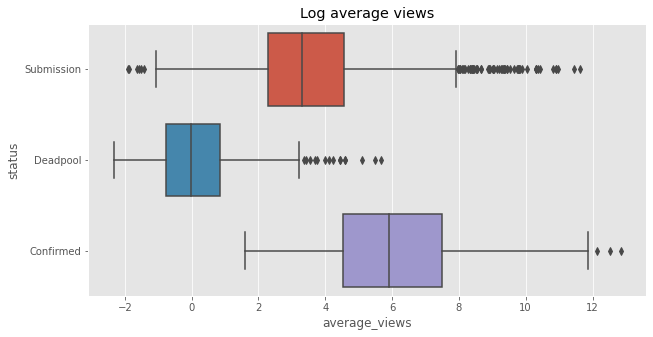

In [163]:
plt.figure(figsize=(10,5))
sns.boxplot(np.log(memes.average_views), memes.status)
plt.title('Log average views')
plt.show()

Посмотрим как число просмотров ведёт себя в зависимости от часа добавления мема.

In [164]:
memes['log_average_views'] = np.log(memes.average_views)

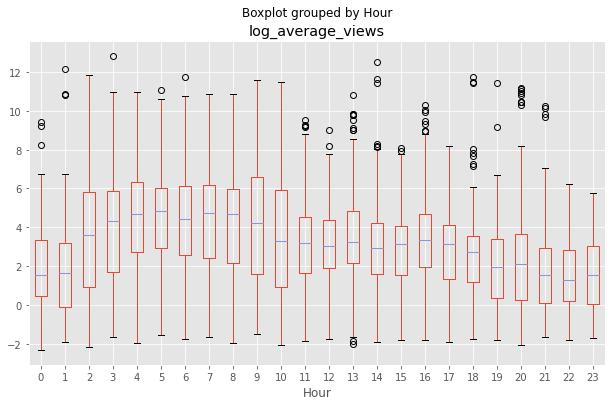

In [165]:
memes.boxplot(column='log_average_views', by='Hour', figsize=(10,6))
plt.show()

Как ведёт себя среднее число просмотров в зависимости от дня недели, когда был добавлен мем

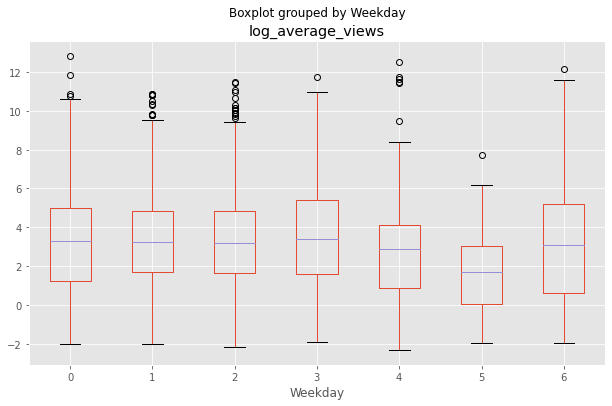

In [166]:
memes.boxplot(column="log_average_views", by='Weekday', figsize=(10,6))
plt.show()

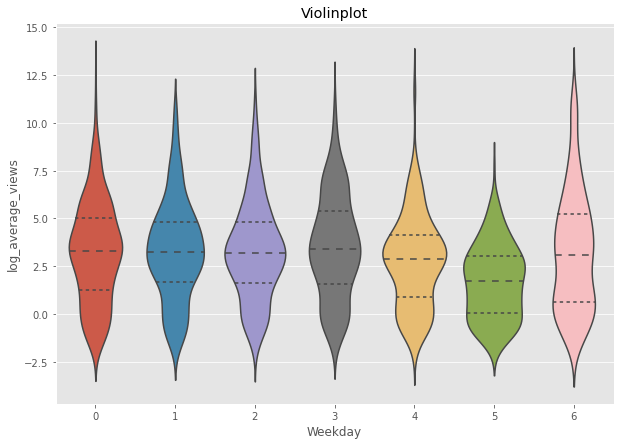

In [168]:
plt.figure(figsize=(10,7))
sns.violinplot(x='Weekday', y='log_average_views', data=memes, inner="quartile")
plt.title('Violinplot')
plt.show()

Добавим дополнительное разбиение по статусу мема.

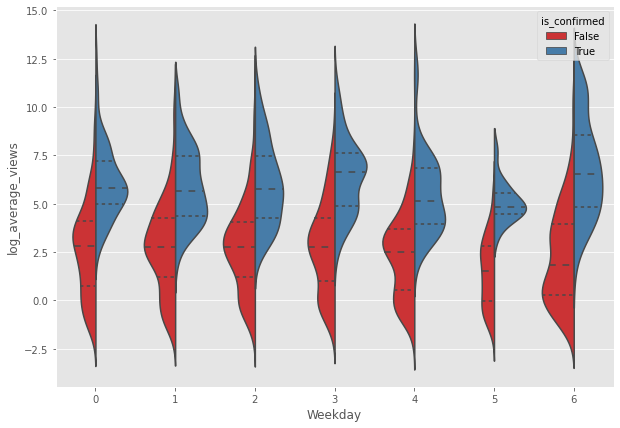

In [169]:
plt.figure(figsize=(10, 7))

memes['is_confirmed'] = memes.status=='Confirmed'

sns.violinplot(x='Weekday',
               y='log_average_views',
               hue='is_confirmed',
               data=memes,
               split=True,
               palette='Set1',
               inner='quartile'
)

plt.show()

Посмотрим на корреляции между переменными внутри данных

<AxesSubplot:>

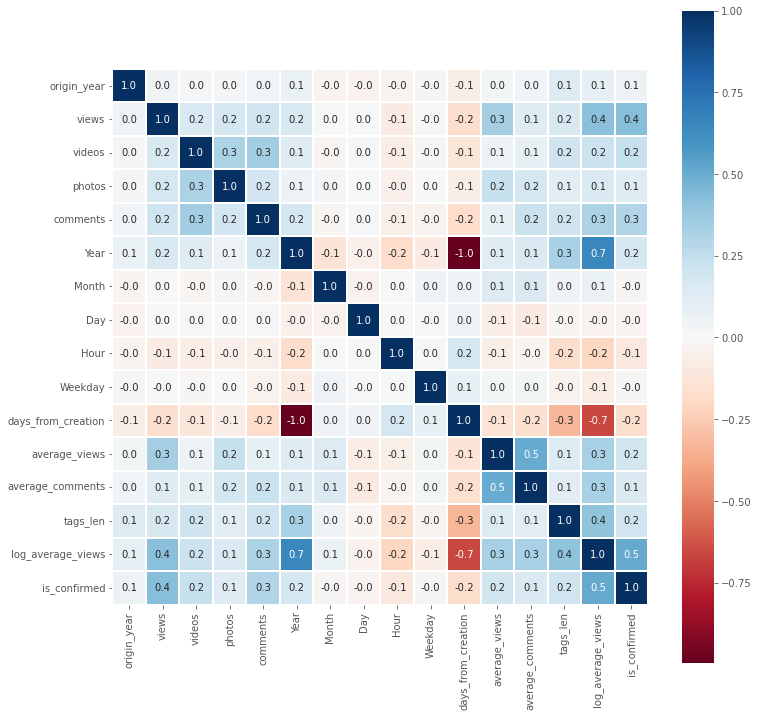

In [170]:
plt.subplots(figsize=(12, 12))

sns.heatmap(memes.corr(),
            square=True,
            annot=True,
            fmt='.1f',
            linewidths=0.1,
            cmap='RdBu'
)

C:\Users\misha\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


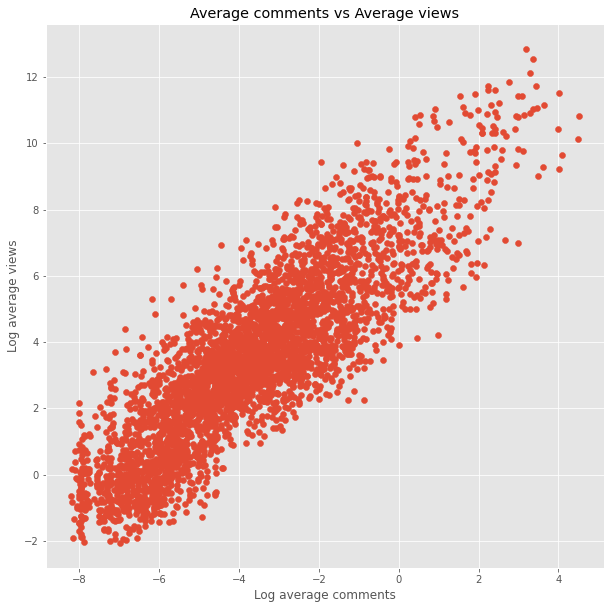

In [171]:
plt.figure(figsize=(10,10))
plt.scatter(np.log(memes.average_comments), np.log(memes.average_views))
plt.title('Average comments vs Average views')
plt.ylabel('Log average views')
plt.xlabel('Log average comments')
plt.show()

Нелинейная взаимосвязь превращается в линейную при логарифимировании (гиперболическая взаимосвзязь)

Если мем оказался подствержденным, происходит качественные сдвиг в числе просмотров